In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruits


In [ ]:
import os

train_dir = os.path.join(path, 'fruits-360_100x100/fruits-360', 'Training')
test_dir = os.path.join(path, 'fruits-360_100x100/fruits-360', 'Test')

print("Training classes:", len(os.listdir(train_dir)))
print("Test classes:", len(os.listdir(test_dir)))

Training classes: 207
Test classes: 207


In [ ]:
from tensorflow.keras.applications import ResNet50
# Load Pretrained ResNet50
resnet_model = ResNet50(weights='imagenet')
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

train_ds = image_dataset_from_directory(train_dir, image_size=(224, 224), batch_size=32, label_mode='categorical', validation_split=0.2, subset='training', seed=42)
val_ds = image_dataset_from_directory(train_dir, image_size=(224, 224), batch_size=32, label_mode='categorical', validation_split=0.2, subset='validation', seed= 42)
test_ds = image_dataset_from_directory(test_dir, image_size=(224, 224), batch_size=32, label_mode='categorical')

num_classes = len(train_ds.class_names)

# Pretrained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Add new head layers (finetuning last layers)
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # reduce feature maps to a vector
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 104456 files belonging to 207 classes.
Using 83565 files for training.
Found 104456 files belonging to 207 classes.
Using 20891 files for validation.
Found 34864 files belonging to 207 classes.


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 207)            │        53,199 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,165,455 (92.18 MB)

 Trainable params: 577,743 (2.20 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

# Evaluate
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc}")

Epoch 1/5
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 305s 113ms/step - accuracy: 0.6094 - loss: 1.7291 - val_accuracy: 0.9908 - val_loss: 0.0303
Epoch 2/5
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 315s 111ms/step - accuracy: 0.9455 - loss: 0.1649 - val_accuracy: 0.9967 - val_loss: 0.0117
Epoch 3/5
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 291s 100ms/step - accuracy: 0.9619 - loss: 0.1119 - val_accuracy: 0.9970 - val_loss: 0.0085
Epoch 4/5
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 292s 112ms/step - accuracy: 0.9667 - loss: 0.0985 - val_accuracy: 0.9976 - val_loss: 0.0068
Epoch 5/5
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 286s 98ms/step - accuracy: 0.9724 - loss: 0.0840 - val_accuracy: 0.9986 - val_loss: 0.0037
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 92s 84ms/step - accuracy: 0.9845 - loss: 0.0664
Test Accuracy: 0.9841957092285156


1090/1090 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step


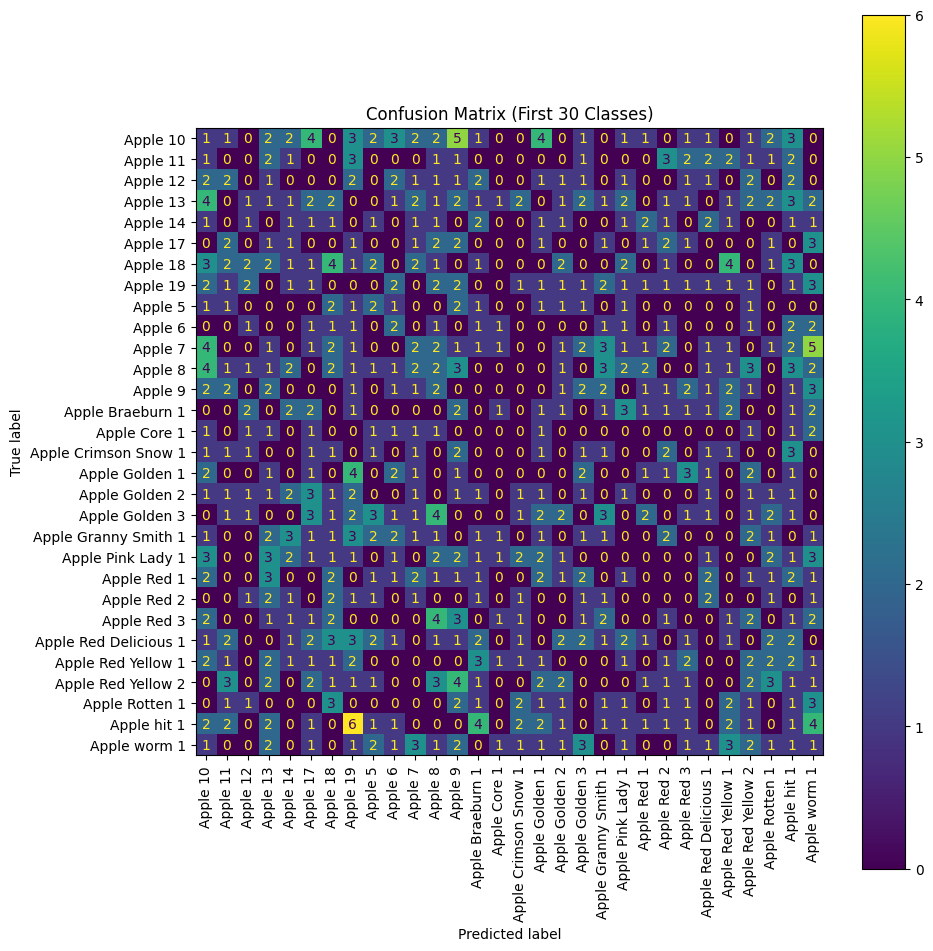

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the directory if it doesn't exist
os.makedirs('classification', exist_ok=True)

# Confusion matrix
y_pred = np.argmax(model.predict(test_ds), axis=1)
y_true = np.concatenate([labels for _, labels in test_ds], axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert from one-hot

cm = confusion_matrix(y_true, y_pred)

# Display a subset of the confusion matrix
num_classes_to_display = 30  # You can change this number
disp = ConfusionMatrixDisplay(confusion_matrix=cm[:num_classes_to_display, :num_classes_to_display],
                              display_labels=train_ds.class_names[:num_classes_to_display])
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=90)
plt.title(f'Confusion Matrix (First {num_classes_to_display} Classes)')
plt.tight_layout()
plt.show()

In [23]:
model.save("classification/ResNet_classification_model.keras")